# Física Nuclear y de Partículas #

## Tema 5. Desintegraciones alfa, beta y gamma.  ##


César Fernández Ramírez\
Departamento de Física Interdisciplinar\
Universidad Nacional de Eduación a Distancia

Versión: Octubre 2024

Contenidos:

- Decaimientos primarios
- Potencial de Gamow para la desintegración alfa
- Desintegración beta
- Decaimiento doble beta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd
import matplotlib.ticker as ticker

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 60*'-'

# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df = df[pd.to_numeric(df['binding'],errors='coerce').notna()]
df['binding'] /= 1000
df['A'] = df['n'] + df['z']

uma = 931.4941024/1000000/1000


Decaimientos primarios

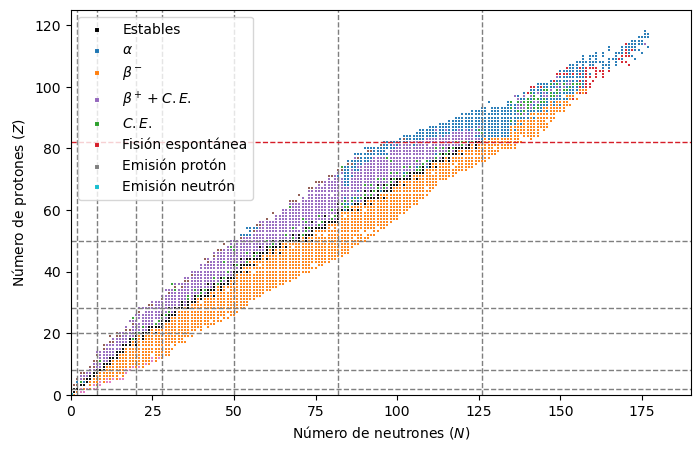

In [2]:
df_es = df.loc[(df['half_life']=='STABLE' )]
dfdecayalfa = df.loc[ ( df['decay_1']=='A') ]
dfdecaybetam = df.loc[( df['decay_1']=='B-')]
dfdecaybetap = df.loc[( df['decay_1']=='EC+B+')]
dfcaptura = df.loc[( df['decay_1']=='EC')]
dfsf = df.loc[( df['decay_1']=='SF')]
dfdecayN = df.loc[ ( ( df['decay_1']=='N') | ( df['decay_1']=='2N') ) ]
dfdecayP = df.loc[ ( ( df['decay_1']=='P') | ( df['decay_1']=='2N') ) ]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
x = np.linspace(1, 125, 125)
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,190))
ax.set_ylim((0,125))
plt.hlines( [2,8,20,28,50,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 82, 0, 190,colors=jpac_color[1], lw=1., linestyles='dashed')
ax.scatter(df_es['n'],df_es['z'],marker='s',s=4.5, c=jpac_color[10],edgecolors='white',lw=0.05)
ax.scatter(dfdecayalfa['n'],dfdecayalfa['z'],marker='s',s=4.5, c=jpac_color[0],edgecolors='white',lw=0.05)
ax.scatter(dfdecaybetam['n'],dfdecaybetam['z'],marker='s',s=4.5, c=jpac_color[3],edgecolors='white',lw=0.05)
ax.scatter(dfdecaybetap['n'],dfdecaybetap['z'],marker='s',s=4.5, c=jpac_color[4],edgecolors='white',lw=0.05)
ax.scatter(dfcaptura['n'],dfcaptura['z'],marker='s',s=4.5, c=jpac_color[2],edgecolors='white',lw=0.05)
ax.scatter(dfsf['n'],dfsf['z'],marker='s',s=4.5, c=jpac_color[1],edgecolors='white',lw=0.05)
ax.scatter(dfdecayP['n'],dfdecayP['z'],marker='s',s=4, c=jpac_color[5],edgecolors='white',lw=0.05)
ax.scatter(dfdecayN['n'],dfdecayN['z'],marker='s',s=4, c=jpac_color[6],edgecolors='white',lw=0.05)
ax.scatter(0,0,marker='s',s=10, c=jpac_color[10],edgecolors='white',lw=0.05,label=r'Estables')
ax.scatter(0,0,marker='s',s=10, c=jpac_color[0],edgecolors='white',lw=0.05,label=r'$\alpha$')
ax.scatter(0,0,marker='s',s=10, c=jpac_color[3],edgecolors='white',lw=0.05,label=r'$\beta^-$')
ax.scatter(0,0,marker='s',s=10, c=jpac_color[4],edgecolors='white',lw=0.05,label=r'$\beta^++C.E.$')
ax.scatter(0,0,marker='s',s=10, c=jpac_color[2],edgecolors='white',lw=0.05,label=r'$C.E.$')
ax.scatter(0,0,marker='s',s=10, c=jpac_color[1],edgecolors='white',lw=0.05,label=r'Fisión espontánea')
ax.scatter(0,0,marker='s',s=10, c=jpac_color[9],edgecolors='white',lw=0.05,label=r'Emisión protón')
ax.scatter(0,0,marker='s',s=10, c=jpac_color[8],edgecolors='white',lw=0.05,label=r'Emisión neutrón')
ax.legend(loc='upper left',ncol=1,frameon=True)
plt.show() 
#fig.savefig('decays.pdf', bbox_inches='tight') 

Potencial de Gamow para la desintegración alfa

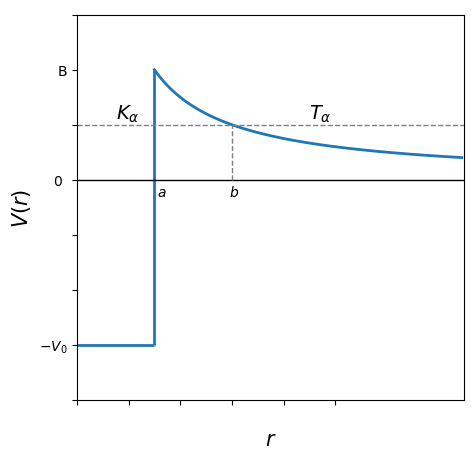

In [3]:
def coulomb(a,B,r):
    return a*B/r

a, alim = 3, 15
B, V0 = 2, -3
rc = np.arange(a,alim,0.1)

fig = plt.figure(figsize=(5,5))
r = np.arange(0.,10.,0.1)
plt.ylabel(r'$V(r)$',fontsize=15)
plt.xlabel(r'$r$',fontsize=15)
plt.xlim((0.,alim))
plt.ylim((-4.,3))
plt.plot(rc,coulomb(a,B,rc),'-',c=jpac_color[0],lw=2.)
plt.hlines(V0,0.,a,colors=jpac_color[0], lw=2., linestyles='solid')
plt.vlines(a,V0,B,colors=jpac_color[0], lw=2., linestyles='solid')
plt.hlines(0,0.,alim,colors=jpac_color[10], lw=1., linestyles='solid')
plt.vlines(2*a,0,B/2,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines(B/2,0.,alim,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.text(a/2,B/2+0.1,r'$K_\alpha$',c=jpac_color[10],fontsize=14)
plt.text(3*a,B/2+0.1,r'$T_\alpha$',c=jpac_color[10],fontsize=14)
plt.text(2*a-0.1,-0.3,r'$b$',c=jpac_color[10],fontsize=10)
plt.text(a+0.1,-0.3,r'$a$',c=jpac_color[10],fontsize=10)
plt.yticks([-4,-3,-2,-1,0,1,2,3],[' ',r'$-V_0$',' ',' ','0 ',' ', 'B', ' '])
plt.xticks([0,2,4,6,8,10],[' ',' ',' ',' ',' ',' '])
plt.show() 
#fig.savefig('gamow.pdf', bbox_inches='tight')    

Desintegración beta

Una parametrización aproximada razonable del espectro de energías del electrón en una desintegración beta es:

$$N(T_e) = Cte  \sqrt{T_e^2 + 2T_e \, m_e\, c^2}(Q - T_e)^2\, (T_e + m_e \,c^2)/c^5$$

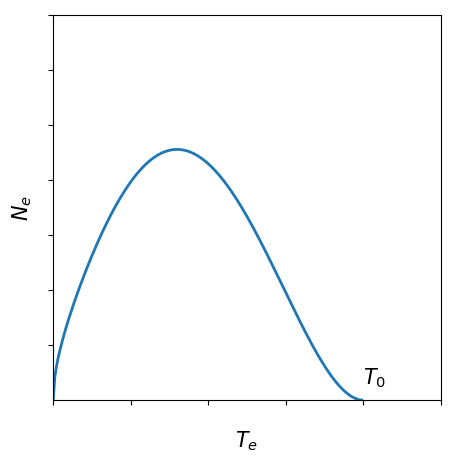

In [4]:
def espectrobeta(Te,Q,constante): # unidades naturales c=1
    me = 0.511
    return constante * np.sqrt(Te**2 + 2*Te *me)*((Q - Te)**2)*(Te + me)

constante, Q = 2, 2
Tini, Tfin = 0, Q
Te = np.arange(Tini,Tfin,0.01)

fig = plt.figure(figsize=(5,5))
plt.ylabel(r'$N_e$',fontsize=15)
plt.xlabel(r'$T_e$',fontsize=15)
plt.xlim((0.,Tfin+0.5))
plt.ylim((0,7))
plt.plot(Te,espectrobeta(Te,Q,constante) ,'-',c=jpac_color[0],lw=2.)
plt.text(Q,0.3,r'$T_0$',c=jpac_color[10],fontsize=15)
plt.xticks([0,0.5,1,1.5,2,2.5],[' ',' ',' ',' ',' ',' '])
plt.yticks([1,2,3,4,5,6,7],[' ',' ',' ',' ',' ',' ',' '])
plt.show() 
#fig.savefig('Espectrobeta.pdf', bbox_inches='tight')    

Decaimiento doble beta

 Elemento, Z, N, Semivida, Principal modo de decaimiento
Se 34 48 9.6E+19 Y 2B-
Br 35 47 35.282 h B-
Kr 36 46 STABLE nan nan
Br Masa= 76.305017719458 GeV
Se Masa= 76.30492250119934 GeV
Kr Masa= 76.30192460170646 GeV


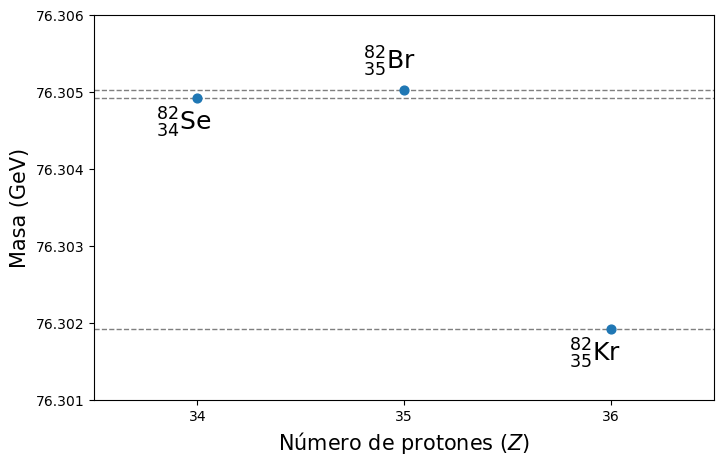

In [5]:
dfSe = df.loc[ ((df['symbol']=="Se") & (df['A']==82))] 
dfBr = df.loc[ ((df['symbol']=="Br") & (df['A']==82))] 
dfKr = df.loc[ ((df['symbol']=="Kr") & (df['A']==82))] 
dfM = pd.concat([dfSe,dfBr,dfKr])
dfM['atomic_mass']  *= uma
anno = 60*60*24*365

print(' Elemento, Z, N, Semivida, Principal modo de decaimiento')
print(dfSe['symbol'].values[0],dfSe['z'].values[0],dfSe['n'].values[0],dfSe['half_life'].values[0],dfSe['unit_hl'].values[0],dfSe['decay_1'].values[0])
print(dfBr['symbol'].values[0],dfBr['z'].values[0],dfBr['n'].values[0],dfBr['half_life'].values[0],dfBr['unit_hl'].values[0],dfBr['decay_1'].values[0])
print(dfKr['symbol'].values[0],dfKr['z'].values[0],dfKr['n'].values[0],dfKr['half_life'].values[0],dfKr['unit_hl'].values[0],dfKr['decay_1'].values[0])

print(dfBr['symbol'].values[0],'Masa=',dfBr['atomic_mass'].values[0]*uma,'GeV')
print(dfSe['symbol'].values[0],'Masa=',dfSe['atomic_mass'].values[0]*uma,'GeV')
print(dfKr['symbol'].values[0],'Masa=',dfKr['atomic_mass'].values[0]*uma,'GeV')

fig = plt.figure(figsize=(8,5))
plt.ylim((76.301,76.306))
plt.xlim((33.5,36.5))

plt.xlabel(r'Número de protones ($Z$)',fontsize=15)
plt.ylabel(r'Masa (GeV)',fontsize=15)
plt.scatter(dfM['z'],dfM['atomic_mass'],marker='o',s=40,c=jpac_color[0],zorder=2)
plt.xticks([34,35,36],['34','35','36'])
plt.yticks([76.301,76.302,76.303,76.304,76.305,76.306],['76.301','76.302','76.303','76.304','76.305','76.306'])
plt.hlines( dfM['atomic_mass'], 33.5,36.5,colors=jpac_color[9], lw=1., linestyles='dashed',zorder=1)
plt.text(33.8,76.3045,r'$^{82}_{34}$Se',c=jpac_color[10],fontsize=18)
plt.text(34.8,76.3053,r'$^{82}_{35}$Br',c=jpac_color[10],fontsize=18)
plt.text(35.8,76.3015,r'$^{82}_{35}$Kr',c=jpac_color[10],fontsize=18)
plt.show()
#fig.savefig('dobleBeta.pdf', bbox_inches='tight') 
